<a href="https://colab.research.google.com/github/jnmelo13/Ciencia-de-dados/blob/main/customer_churn_prediction_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
#Fazendo a importação dos pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

import datetime
!pip install -q xgboost
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Loading Data

In [3]:
#Loading data
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [6]:
df_train.sample(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
20,VA,132,area_code_510,no,no,0,81.1,86,13.79,245.2,72,20.84,237.0,115,10.67,10.3,2,2.78,0,no
1116,WI,101,area_code_415,no,no,0,248.6,102,42.26,174.9,93,14.87,207.2,86,9.32,6.1,3,1.65,3,no
1585,OK,46,area_code_415,no,no,0,164.2,116,27.91,196.2,153,16.68,236.1,119,10.62,8.1,1,2.19,1,no
67,WV,144,area_code_415,no,no,0,201.1,99,34.19,303.5,74,25.80,224.0,119,10.08,13.2,2,3.56,1,no
2091,MD,130,area_code_415,no,yes,45,174.5,120,29.67,217.5,95,18.49,220.3,67,9.91,12.2,2,3.29,1,no
1906,WY,78,area_code_415,no,no,0,147.1,80,25.01,199.7,100,16.97,160.7,106,7.23,13.7,7,3.70,0,no
1751,TN,121,area_code_510,no,yes,26,170.4,91,28.97,254.5,90,21.63,219.6,122,9.88,15.1,5,4.08,0,no
1052,NV,81,area_code_415,no,no,0,145.4,132,24.72,129.3,91,10.99,186.4,109,8.39,5.2,4,1.40,1,no
469,IN,108,area_code_510,no,no,0,293.0,88,49.81,160.6,101,13.65,143.9,87,6.48,10.0,6,2.70,2,no
4029,MT,49,area_code_415,yes,no,0,157.6,101,26.79,256.4,69,21.79,260.8,107,11.74,9.8,4,2.65,1,no


In [7]:
#Creating data dictionary
data_dict = {
  'state': 'abbreviation the name of the state in the country',
  'account_length': 'Number of months the customer has been with the current telco provider',
  'area_code': 'The identification number for a specific area',
  'international_plan': 'If the costumer has iternational plan or not',
  'voice_mail_plan': 'If the costumer has voice mail plan or not',
  'number_vmail_messages': 'Number of voice mail messages',
  'total_day_minutes': 'Total minutes of day calls',
  'total_day_calls': 'Total number of day calls',
  'total_day_charge': 'Total charge of day calls',
  'total_eve_minutes': 'Total minutes of evening calls',
  'total_eve_calls':'Total number of evening calls',
  'total_eve_charge': 'Total charge of evening calls',
  'total_night_minutes': 'Total minutes of night calls',
  'total_night_calls': 'Total number of night calls',
  'total_night_charge': 'Total charge of night calls',
  'total_intl_minutes': 'Total minutes of international calls',
  'total_intl_calls': 'Total number of international calls',
  'total_intl_charge': 'Total charge of international calls',
  'number_customer_service_calls': 'Number of calls to customer service',
  'churn': 'Customer churn'
}

# Null Value Analysis

In [8]:
#Checking null values in the dataset
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

**Observation:** There is no null value in any columns of the dataset

# Exploratory Data Analysis

In [9]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##Categorical

In [10]:
#filtering only categorical columns
df_train_categorical_columns = df_train.select_dtypes(include=['object']).columns
print(f'Quantity of numerical columns: {len(df_train_categorical_columns)}')

Quantity of numerical columns: 5


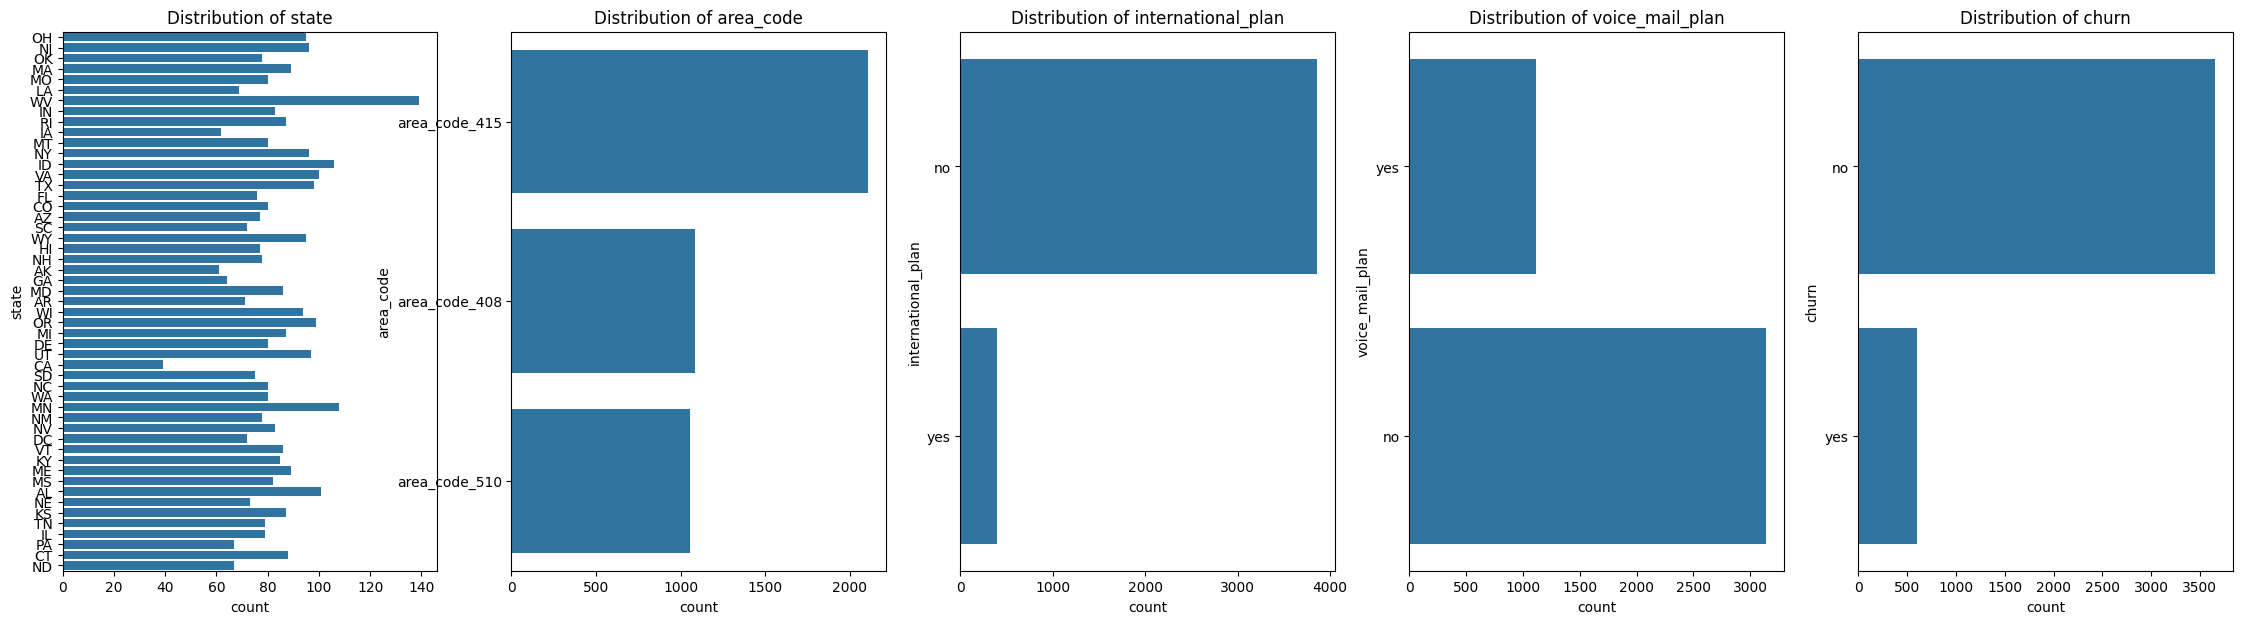

In [11]:
#Plotting bar graph for each numerical column
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(28,7));
for index,col in enumerate(df_train_categorical_columns):
  sns.countplot(y=col, ax = ax[index],data=df_train)
  ax[index].set_title(f'Distribution of {col}')

##Numeric

In [12]:
#filtering only numerical columns
df_train_numerical_columns = df_train.select_dtypes(include=['number']).columns
print(f'Quantity of numerical columns: {len(df_train_numerical_columns)}')

Quantity of numerical columns: 15


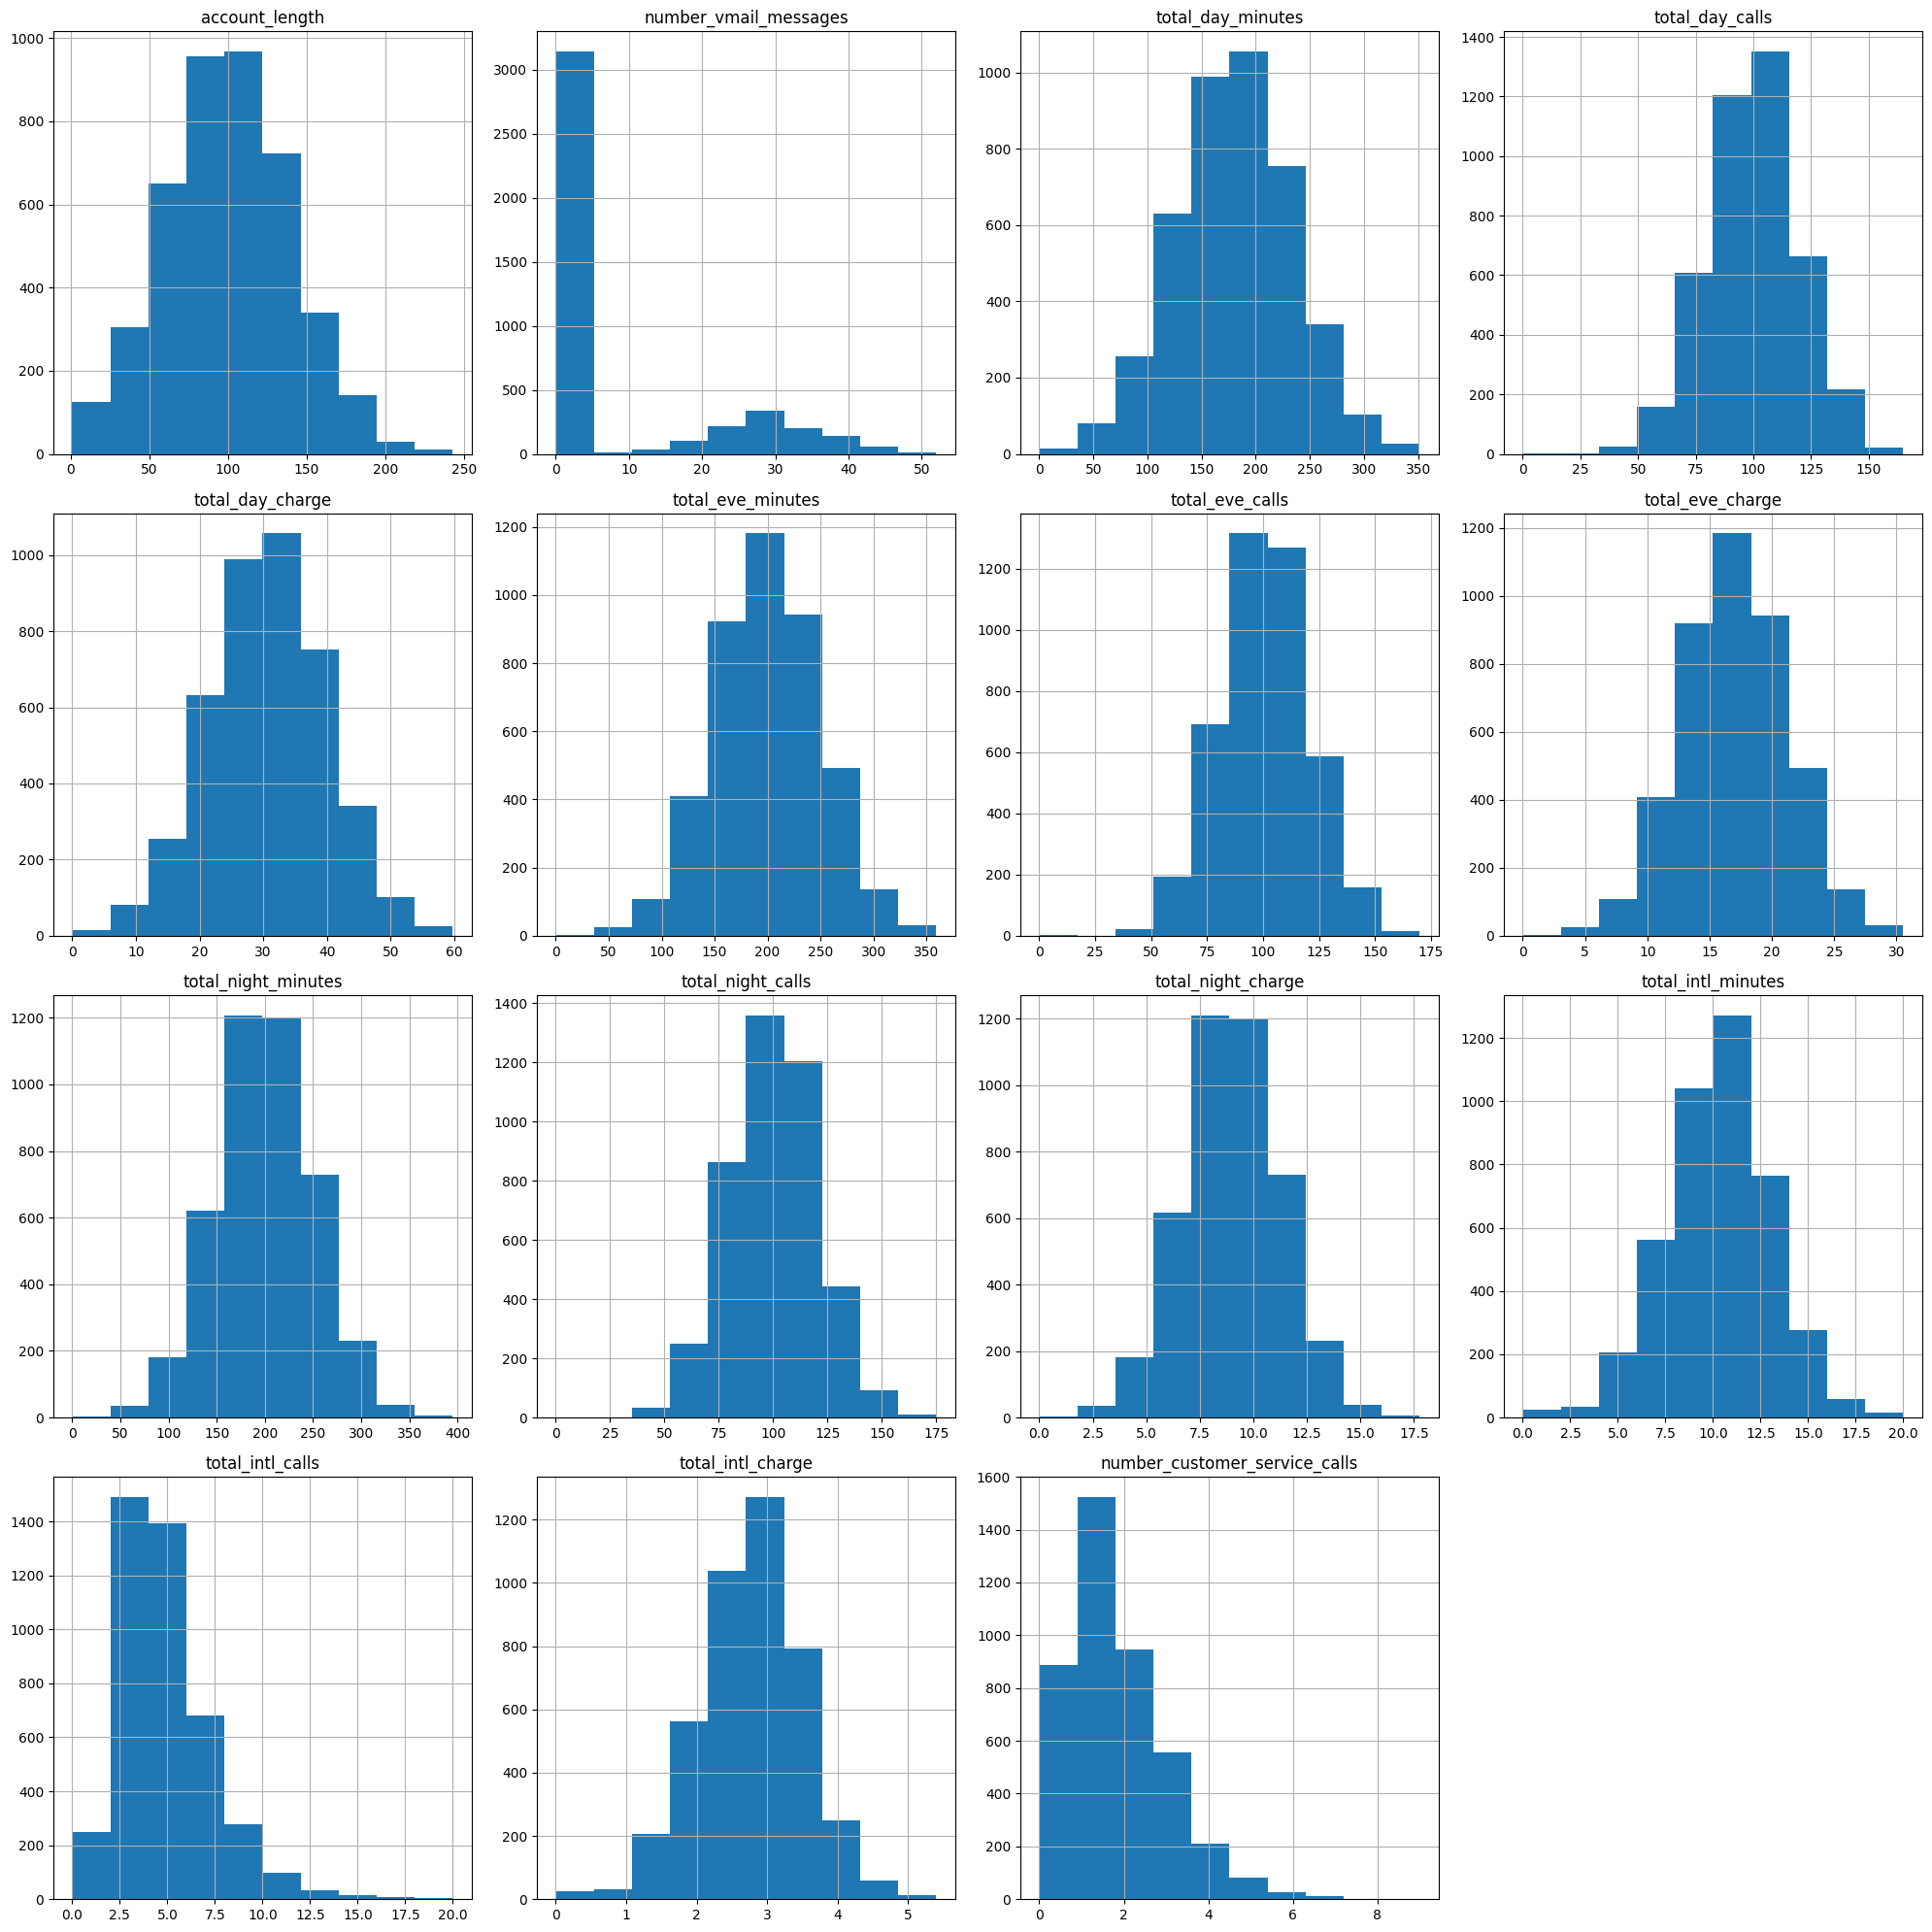

In [13]:
#Plotting histogram for each numerical column
df_train[df_train_numerical_columns].hist(figsize = (20,20))
plt.tight_layout()

##EDA Conclusions

**Observation:**
* Most of the clients don't have international or voice mail plan
* There is a huge difference in the proportion of clients with and without churn. It is necessary to balance the data before train the machine learning algorithm
* There are more than 20 variations in 'state' feature. There is already an area_code to each region, so I will remove this feature in order to don't increase the dataset's dimensionality unnecessarily  
* Every numerical feature seems to follow a normal distribution, the only exception is number_vmail_voice


In [14]:
#Removing 'state' for train dataset
df_train = df_train.drop(columns = 'state')
df_train

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [15]:
#Removing 'state' for test dataset
df_test = df_test.drop(columns = 'state')
df_test

,id,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


#Encoding

In [16]:
df_train_categorical_columns = df_train.select_dtypes(include = 'object').columns
#Showing categorial columns
df_train[df_train_categorical_columns]

,area_code,international_plan,voice_mail_plan,churn
0,area_code_415,no,yes,no
1,area_code_415,no,no,no
2,area_code_408,yes,no,no
3,area_code_415,yes,no,no
4,area_code_510,no,yes,no
...,...,...,...,...
4245,area_code_415,no,no,no
4246,area_code_408,no,no,no
4247,area_code_408,no,no,no
4248,area_code_408,no,yes,no


In [17]:
#Encoding feature area_code for train dataset
df_train_new =  pd.concat([df_train.drop('area_code',axis = 1),pd.get_dummies(df_train['area_code'])],axis=1)
df_train_new = df_train_new.replace(True,1)
df_train_new = df_train_new.replace(False,0)

#Encoding feature area_code for test dataset
df_test_new =  pd.concat([df_test.drop('area_code',axis = 1),pd.get_dummies(df_test['area_code'])],axis=1)
df_test_new = df_test_new.replace(True,1)
df_test_new = df_test_new.replace(False,0)

In [18]:
#Encoding features that has only no and yes as answer for train dataset
df_train_new = df_train_new.replace('no',0)
df_train_new = df_train_new.replace('yes',1)

#Encoding features that has only no and yes as answer for test dataset
df_test_new = df_test_new.replace('no',0)
df_test_new = df_test_new.replace('yes',1)

In [19]:
df_train_new.dtypes

account_length                     int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
area_code_408                      int64
area_code_415                      int64
area_code_510                      int64
dtype: object

In [20]:
df_train_new.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
area_code_408                    0
area_code_415                    0
area_code_510                    0
dtype: int64

In [21]:
#filtering features that have a significant correlation with the target variable
df_corr = df_train_new.corr()
df_corr[(df_corr['churn']>0.15) |( df_corr['churn']<-0.15)]['churn']

international_plan               0.259053
total_day_minutes                0.215272
total_day_charge                 0.215263
number_customer_service_calls    0.221220
churn                            1.000000
Name: churn, dtype: float64

#Outliers Analysis

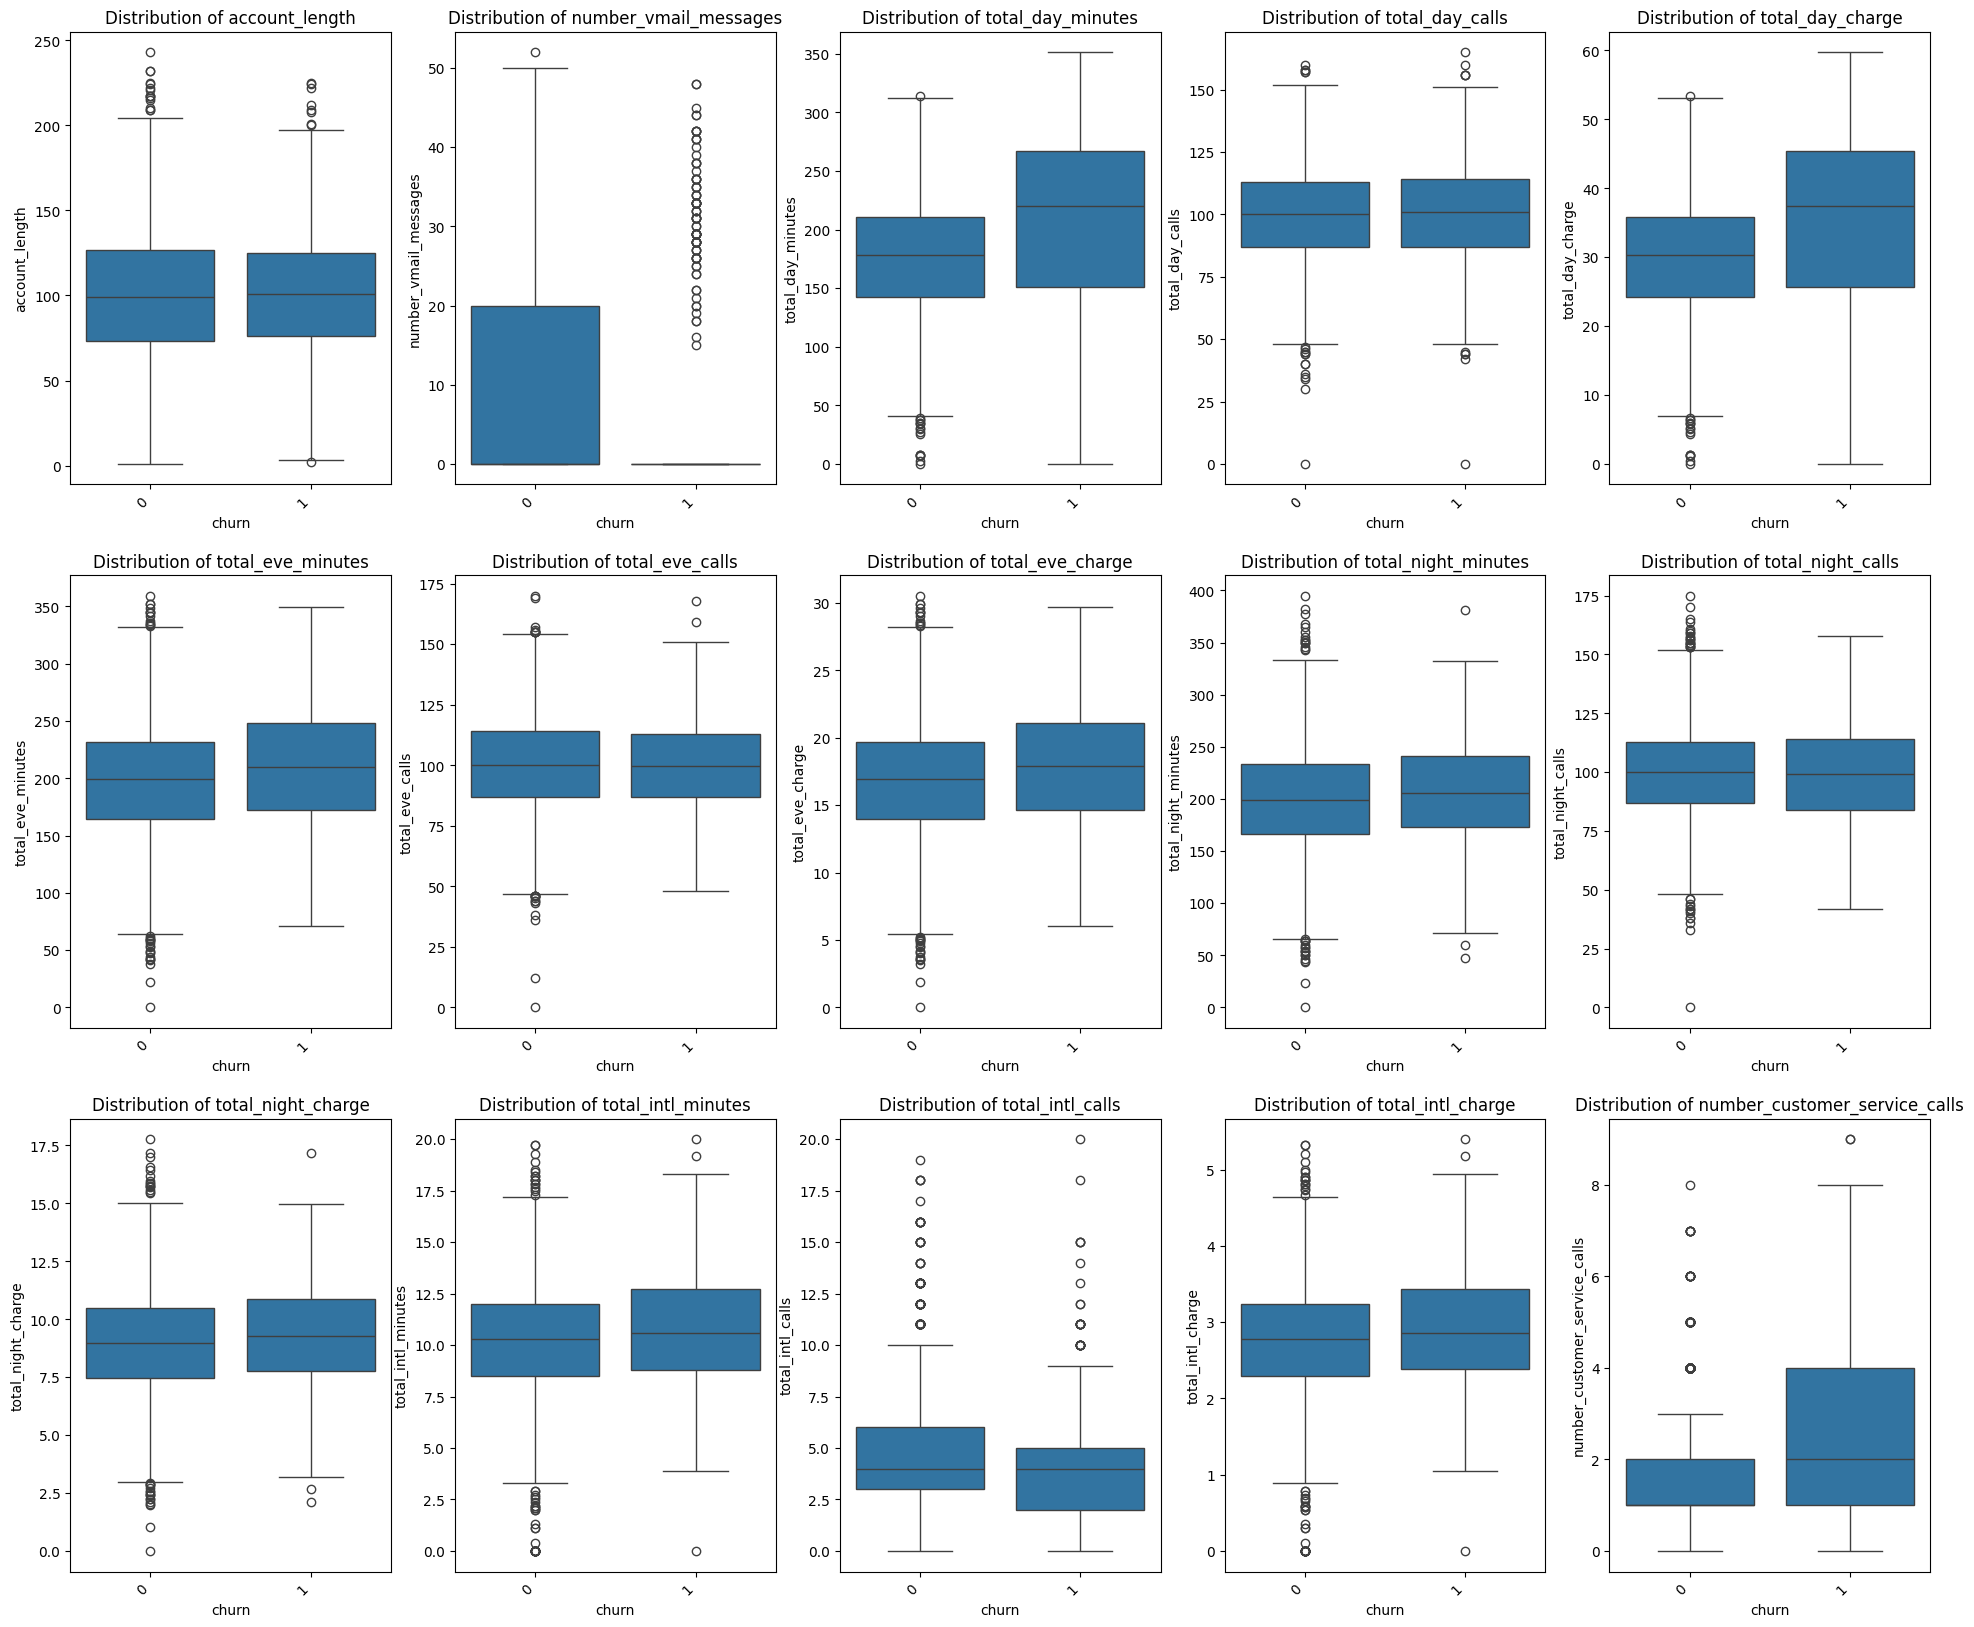

In [22]:
#Plotting boxplot graph for each numerical column in order to analyse the outliers
_, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (24,20))
i=0
cont = 0
while i < 3:
  j=0
  while j<5 and cont<15:
    col = df_train_numerical_columns[cont]
    sns.boxplot(data=df_train_new, y=col, x = 'churn', ax = ax[i][j])
    ax[i][j].set_title(f'Distribution of {col}')
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=45, ha='right')
    j+=1
    cont+=1
  i+=1

**Observation:**
* Every column in this dataset have outliers
* I will use the IQR methodology to identify outliers
* There is a high number of outliers, so that can not be just removed. To deal with this I will fill Outliers with the median

In [23]:
# Using Interquartile Range to identify outliers
Q1 = df_train_new[df_train_numerical_columns].quantile(0.25)
Q3 = df_train_new[df_train_numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [24]:
# defining outliers out of the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
qt_outliers = ((df_train_new[df_train_numerical_columns] < (Q1 - 1.5 * IQR)) | (df_train_new[df_train_numerical_columns] > (Q3 + 1.5 * IQR))).sum()
qt_outliers.sort_values(ascending = False)

number_customer_service_calls    335
total_intl_calls                 100
number_vmail_messages             86
total_intl_minutes                62
total_intl_charge                 62
total_night_minutes               37
total_night_charge                37
total_eve_minutes                 34
total_eve_charge                  34
total_night_calls                 33
total_day_calls                   28
total_day_charge                  26
total_day_minutes                 25
total_eve_calls                   24
account_length                    20
dtype: int64

In [25]:
#showing outliers in percentual numbers
outliers_summary = pd.DataFrame({'Outliers': qt_outliers, 'Percentual': (qt_outliers / len(df_train_new)) * 100})
outliers_summary[outliers_summary['Outliers'] > 0].sort_values(by ='Percentual', ascending = False)

,Outliers,Percentual
number_customer_service_calls,335,7.882353
total_intl_calls,100,2.352941
number_vmail_messages,86,2.023529
total_intl_minutes,62,1.458824
total_intl_charge,62,1.458824
total_night_minutes,37,0.870588
total_night_charge,37,0.870588
total_eve_minutes,34,0.800000
total_eve_charge,34,0.800000
total_night_calls,33,0.776471


In [26]:
#Capturing the list of outliers in the new dataset
outliers = ((df_train_new[df_train_numerical_columns] < (Q1 - 1.5 * IQR)) | (df_train_new[df_train_numerical_columns] > (Q3 + 1.5 * IQR))).any(axis = 1)
outliers

0       False
1       False
2        True
3       False
4        True
        ...  
4245    False
4246    False
4247    False
4248    False
4249     True
Length: 4250, dtype: bool

In [27]:
IQR

account_length                   54.0000
number_vmail_messages            16.0000
total_day_minutes                72.8750
total_day_calls                  26.0000
total_day_charge                 12.3850
total_eve_minutes                67.8500
total_eve_calls                  27.0000
total_eve_charge                  5.7650
total_night_minutes              67.4750
total_night_calls                27.0000
total_night_charge                3.0375
total_intl_minutes                3.5000
total_intl_calls                  3.0000
total_intl_charge                 0.9400
number_customer_service_calls     1.0000
dtype: float64

In [28]:
#Filling outliers with median
for feature in df_train_numerical_columns:
  lower_limit = (Q1[feature] - 1.5 * IQR[feature])
  upper_limit = (Q3[feature] + 1.5 * IQR[feature])
  feature_median = df_train_new[feature].median()
  df_train_new.loc[(df_train_new[feature] < lower_limit) | (df_train_new[feature] > upper_limit),feature] = feature_median

In [29]:
# Checking if still are outliers
qt_outliers = ((df_train_new[df_train_numerical_columns] < (Q1 - 1.5 * IQR)) | (df_train_new[df_train_numerical_columns] > (Q3 + 1.5 * IQR))).sum()
qt_outliers.sort_values(ascending = False)

account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

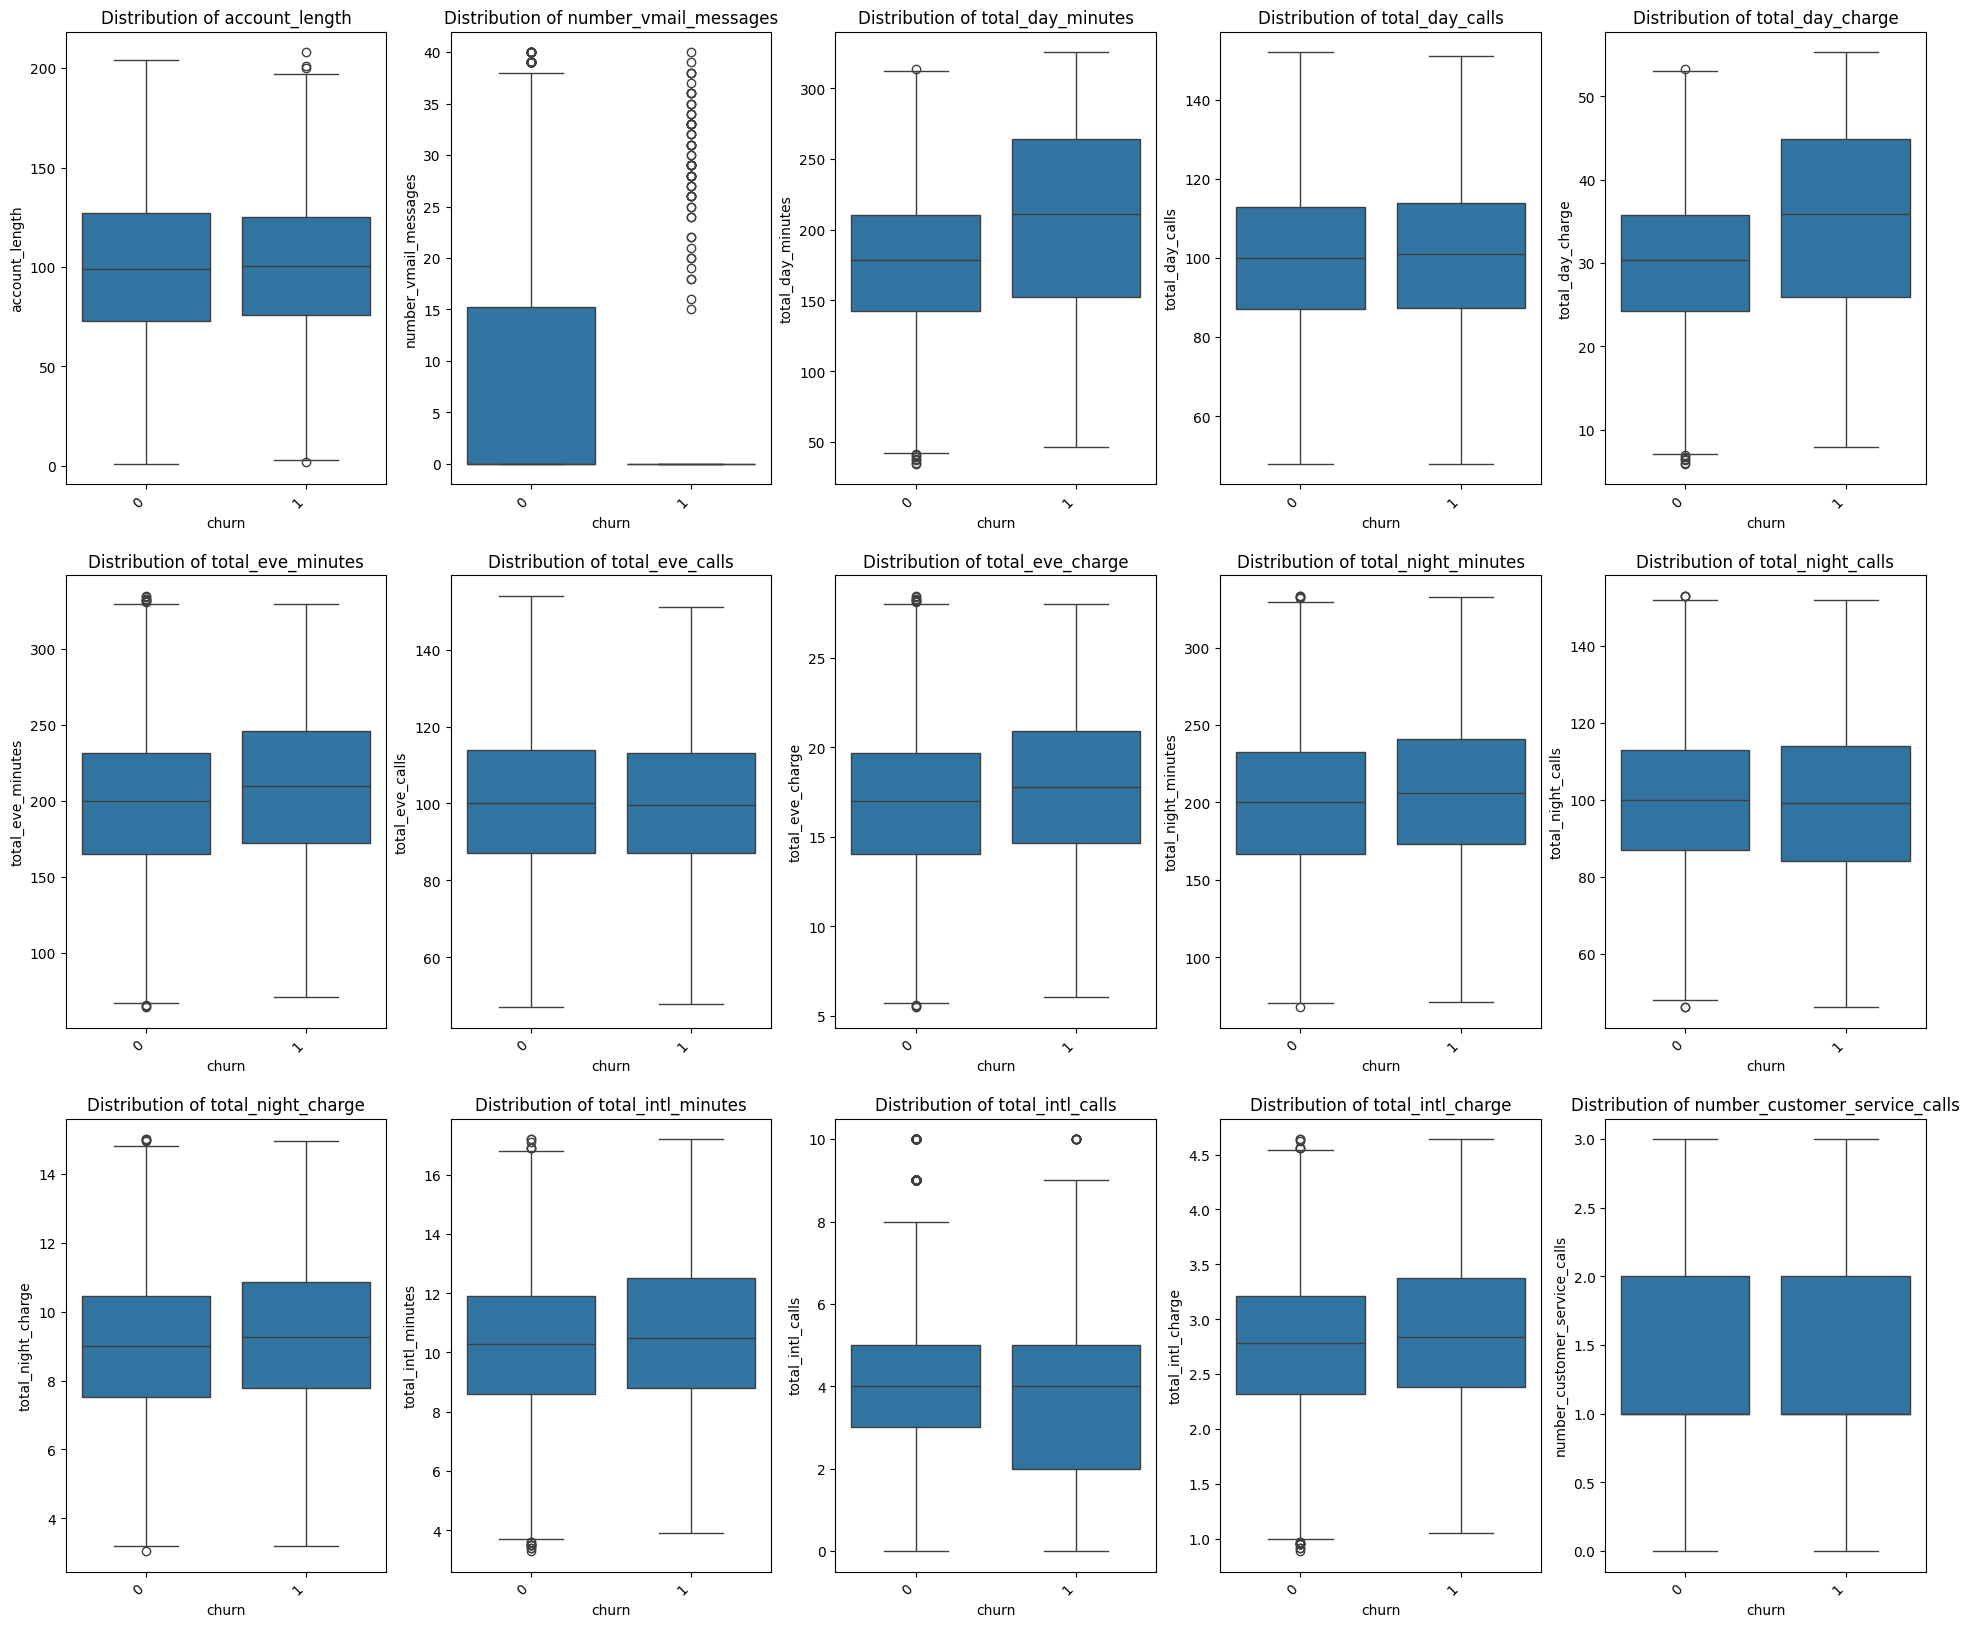

In [30]:
#Plotting boxplot graph for each numerical column without outliers
_, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (24,20))
i=0
cont = 0
while i < 3:
  j=0
  while j<5 and cont<15:
    col = df_train_numerical_columns[cont]
    sns.boxplot(data=df_train_new, x = 'churn', y=col, ax = ax[i][j])
    ax[i][j].set_title(f'Distribution of {col}')
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=45, ha='right')
    j+=1
    cont+=1
  i+=1

#Correlation Analysis

In [31]:
# showing the features most correlated with the target feature
df_corr = df_train_new.corr()
df_corr[(df_corr['churn']>0.1) |( df_corr['churn']<-0.1)]['churn']

international_plan       0.259053
voice_mail_plan         -0.114643
number_vmail_messages   -0.107983
total_day_minutes        0.197499
total_day_charge         0.196064
churn                    1.000000
Name: churn, dtype: float64

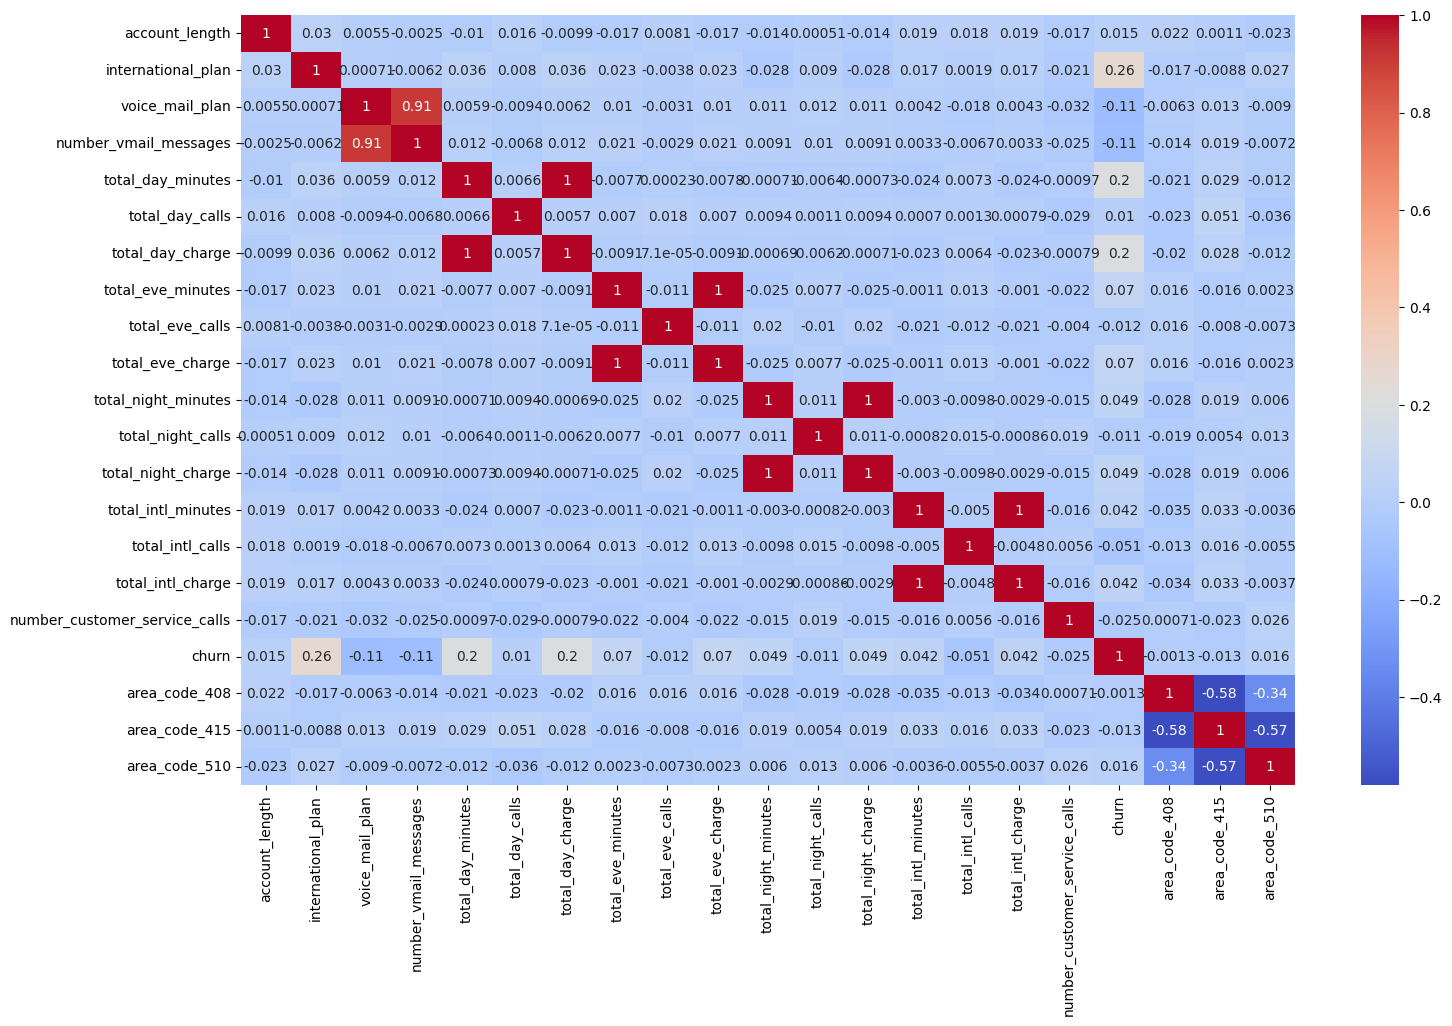

In [32]:
plt.figure(figsize = (17,10))
sns.heatmap(data = df_corr, annot  = True,cmap='coolwarm');

**Observation:**
* There are only five variables with any correlation with the target. The highest one is 'international plan', with a value about 0.25 which still low.

#Modelling

##Preprocessing

In [33]:
df_train_final = df_train_new

In [34]:
y = df_train_final['churn']
X = df_train_final.drop(columns = 'churn')

In [35]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
2,84,1,0,0,299.4,71,50.90,200.7,88,17.06,196.9,89,8.86,6.6,7,1.78,2,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
4,121,0,1,24,218.2,88,37.09,200.7,108,17.06,212.6,118,9.57,7.5,7,2.03,3,0,0,1


In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [37]:
#Dividindo entre base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#treating unbalanced data using the SMOTE method
#SMOTE identifies the minority class and creates synthetic records to increase the number of occurrences of that
sm = SMOTE(sampling_strategy = 1, random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [39]:
print('Treinamento: ',X_train.shape,y_train.shape)
print('Teste: ',X_test.shape,y_test.shape)

Treinamento:  (5862, 20) (5862,)
Teste:  (850, 20) (850,)


In [40]:
scaler = StandardScaler()
scaler = scaler.fit(X_test)

In [41]:
#Padronizando dados
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

print('Treinamento: ',X_train_scaled.shape)
print('Teste: ',X_test_scaled.shape)

Treinamento:  (5862, 20)
Teste:  (850, 20)


##Testing Models

In [42]:
#Testing for Logistic Regression, RadomForestClassifier, Naive Bayes, XGBoost
LR = LogisticRegression()
RF = RandomForestClassifier()
NV = GaussianNB()
XB = XGBClassifier()

models = {'Logistic Regression': LR, 'RandomForestClassifier': RF, 'Naive Bayes': NV, 'XGBoost': XB}
metrics_df = pd.DataFrame(columns=['Model','dataset', 'Accuracy', 'Precision','AUC','Recall'])


for model_name, model in models.items():
  #Training the model
  model.fit(X_train_scaled, y_train)
  y_pred_train = model.predict(X_train_scaled)
  y_pred_test = model.predict(X_test_scaled)

  #Calculating performance
  accuracy_train = accuracy_score(y_train, y_pred_train)
  auc_train = roc_auc_score(y_train, y_pred_train)
  recall_train = recall_score(y_train, (y_pred_train > 0.5))
  precision_train = precision_score(y_train, (y_pred_train > 0.5))

  loc = len(metrics_df)
  new_row = {'Model': model_name,'dataset': 'Train', 'Accuracy': accuracy_train, 'Precision': precision_train,'AUC': auc_train,'Recall': recall_train}
  metrics_df.loc[loc] = new_row

  accuracy_test = accuracy_score(y_test, y_pred_test)
  auc_test = roc_auc_score(y_test, y_pred_test)
  recall_test = recall_score(y_test, (y_pred_test > 0.5))
  precision_test = precision_score(y_test, (y_pred_test > 0.5))

  loc = len(metrics_df)
  new_row = {'Model': model_name,'dataset': 'Test', 'Accuracy': accuracy_test, 'Precision': precision_test,'AUC': auc_test,'Recall': recall_test}
  metrics_df.loc[loc] = new_row

In [43]:
metrics_df

,Model,dataset,Accuracy,Precision,AUC,Recall
0,Logistic Regression,Train,0.828727,0.885554,0.828727,0.755032
1,Logistic Regression,Test,0.851765,0.514851,0.667570,0.403101
2,RandomForestClassifier,Train,1.000000,1.000000,1.000000,1.000000
3,RandomForestClassifier,Test,0.883529,0.702703,0.686294,0.403101
4,Naive Bayes,Train,0.773797,0.740198,0.773797,0.843739
5,Naive Bayes,Test,0.652941,0.242236,0.633116,0.604651
6,XGBoost,Train,0.999488,0.999659,0.999488,0.999318
7,XGBoost,Test,0.903529,0.728155,0.771280,0.581395


In [44]:
metrics_df[metrics_df['dataset'] == 'Test'].sort_values(by = 'AUC', ascending = False)

,Model,dataset,Accuracy,Precision,AUC,Recall
7,XGBoost,Test,0.903529,0.728155,0.771280,0.581395
3,RandomForestClassifier,Test,0.883529,0.702703,0.686294,0.403101
1,Logistic Regression,Test,0.851765,0.514851,0.667570,0.403101
5,Naive Bayes,Test,0.652941,0.242236,0.633116,0.604651


In [45]:
#Testing adjust of hyperparameters for top 1 model: XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5]
}

# Configuração do GridSearchCV
grid_search_xgb = GridSearchCV(estimator = XB,
                               param_grid = param_grid,
                               cv = 5,
                               scoring = 'accuracy',
                               )

grid_search_xgb.fit(X_train_scaled, y_train)

#Best parameters configuration
print(f'Melhores parametros {grid_search_xgb.best_params_}')
xgb_hyper = grid_search_xgb.best_estimator_

y_pred_train = xgb_hyper.predict(X_train_scaled)
y_pred_test = xgb_hyper.predict(X_test_scaled)

#Calculating performance
accuracy_train = accuracy_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)
recall_train = recall_score(y_train, (y_pred_train > 0.5))
precision_train = precision_score(y_train, (y_pred_train > 0.5))

print('--- Train metrics ---')
print(f'AUC {auc_train}')
print(f'Accuracy {accuracy_train}')
print(f'Recall {recall_train}')
print(f'Precision {precision_train}')

accuracy_test = accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)
recall_test = recall_score(y_test, (y_pred_test > 0.5))
precision_test = precision_score(y_test, (y_pred_test > 0.5))

print('--- Test metrics ---')
print(f'AUC {auc_test}')
print(f'Accuracy {accuracy_test}')
print(f'Recall {recall_test}')
print(f'Precision {precision_test}')

#Adding metrics for hyperparameters adjusted models
loc = len(metrics_df)
new_row = {'Model': 'XGBoost_hyperparameters','dataset': 'Train', 'Accuracy': accuracy_train, 'Precision': precision_train,'AUC': auc_train,'Recall': recall_train}
metrics_df.loc[loc] = new_row

loc = len(metrics_df)
new_row = {'Model': 'XGBoost_hyperparameters','dataset': 'Test', 'Accuracy': accuracy_test, 'Precision': precision_test,'AUC': auc_test,'Recall': recall_test}
metrics_df.loc[loc] = new_row


Melhores parametros {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
--- Train metrics ---
AUC 0.9933469805527123
Accuracy 0.9933469805527124
Recall 0.9887410440122825
Precision 0.9979338842975206
--- Test metrics ---
AUC 0.7849885494952101
Accuracy 0.9105882352941177
Recall 0.6046511627906976
Precision 0.7572815533980582


In [46]:
#Testing adjust of hyperparameters for top 2 model: RandomForestClassifier

# Definição do espaço de hiperparâmetros para otimização
parameters = {'n_estimators': [30, 50, 70, 90, 95, 100],
              'max_depth': [2,3,5,7,10]}

# Configuração do GridSearchCV
grid_search_rf = GridSearchCV(estimator = RF,
                               param_grid = parameters,
                               cv = 5,
                               scoring = 'accuracy',
                               verbose = 1)

grid_search_rf.fit(X_train_scaled, y_train)

#Best parameters configuration
print(f'Melhores parametros {grid_search_xgb.best_params_}')
rf_hyper = grid_search_rf.best_estimator_

y_pred_train = rf_hyper.predict(X_train_scaled)
y_pred_test = rf_hyper.predict(X_test_scaled)

#Calculating performance
accuracy_train = accuracy_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)
recall_train = recall_score(y_train, (y_pred_train > 0.5))
precision_train = precision_score(y_train, (y_pred_train > 0.5))

print('--- Train metrics ---')
print(f'AUC {auc_train}')
print(f'Accuracy {accuracy_train}')
print(f'Recall {recall_train}')
print(f'Precision {precision_train}')

accuracy_test = accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)
recall_test = recall_score(y_test, (y_pred_test > 0.5))
precision_test = precision_score(y_test, (y_pred_test > 0.5))

print('--- Test metrics ---')
print(f'AUC {auc_test}')
print(f'Accuracy {accuracy_test}')
print(f'Recall {recall_test}')
print(f'Precision {precision_test}')

#Adding metrics for hyperparameters adjusted models
loc = len(metrics_df)
new_row = {'Model': 'RandomForest_hyperparameters','dataset': 'Train', 'Accuracy': accuracy_train, 'Precision': precision_train,'AUC': auc_train,'Recall': recall_train}
metrics_df.loc[loc] = new_row

loc = len(metrics_df)
new_row = {'Model': 'RandomForest_hyperparameters','dataset': 'Test', 'Accuracy': accuracy_test, 'Precision': precision_test,'AUC': auc_test,'Recall': recall_test}
metrics_df.loc[loc] = new_row

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parametros {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
--- Train metrics ---
AUC 0.9549641760491299
Accuracy 0.95496417604913
Recall 0.9184578642101672
Precision 0.9907986750092014
--- Test metrics ---
AUC 0.6743809738842478
Accuracy 0.8741176470588236
Recall 0.3875968992248062
Precision 0.6410256410256411


#Selecting Model

In [55]:
metrics_df[metrics_df['dataset'] == 'Test'].sort_values(by = 'AUC', ascending = False).reset_index(drop = True)

,Model,dataset,Accuracy,Precision,AUC,Recall
0,XGBoost_hyperparameters,Test,0.910588,0.757282,0.784989,0.604651
1,XGBoost,Test,0.903529,0.728155,0.771280,0.581395
2,RandomForestClassifier,Test,0.883529,0.702703,0.686294,0.403101
3,RandomForest_hyperparameters,Test,0.874118,0.641026,0.674381,0.387597
4,Logistic Regression,Test,0.851765,0.514851,0.667570,0.403101
5,Naive Bayes,Test,0.652941,0.242236,0.633116,0.604651


**Conclusion:** The model that identifies positive and negative classes with best performance in the every four metrics analised is XGBoost, considering the following parameters configuration: 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300.

#Predicting for test dataset

In [54]:
df_test_scalade = scaler.transform(df_test_new.drop(columns = 'id'))
df_test_scalade

array([[ 0.71275028, -0.33115038,  1.71857161, ..., -0.5547002 ,
         0.99530514, -0.59637394],
       [ 0.45949481,  3.01977609, -0.58187858, ..., -0.5547002 ,
        -1.00471701,  1.67680028],
       [-0.95873583, -0.33115038, -0.58187858, ..., -0.5547002 ,
         0.99530514, -0.59637394],
       ...,
       [ 1.32056342, -0.33115038, -0.58187858, ..., -0.5547002 ,
         0.99530514, -0.59637394],
       [-0.98406138, -0.33115038, -0.58187858, ..., -0.5547002 ,
         0.99530514, -0.59637394],
       [ 0.23156489, -0.33115038, -0.58187858, ..., -0.5547002 ,
        -1.00471701,  1.67680028]])

In [56]:
y_final_test = xgb_hyper.predict(df_test_scalade)

In [57]:
df_test_new['prediction'] = y_final_test

In [62]:
df_test_new['prediction'].value_counts()

prediction
0    656
1     94
Name: count, dtype: int64

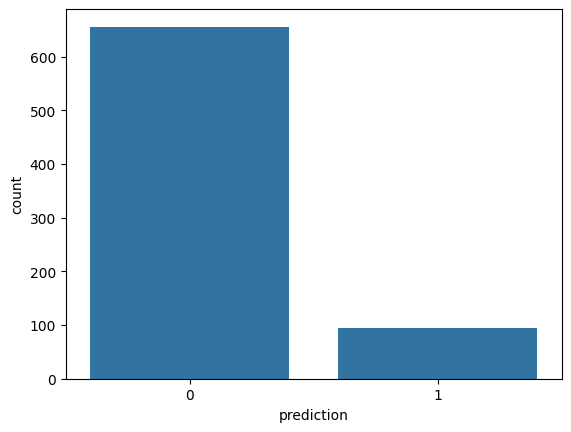

In [60]:
sns.countplot(data =df_test_new, x='prediction');

**Observation:** For test dataset the proportion between positive and negative classes follow the same proportion found in the training dataset, about 15% of churn